### Import Package

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv("Pendapatan.csv",index_col=0)
df.head(2)
df = df.sort_index()

df.sample(3)

,Umur,Kelas Pekerja,Berat Akhir,Pendidikan,Jmlh Tahun Pendidikan,Status Perkawinan,Pekerjaan,Jenis Kelamin,Keuntungan Kapital,Kerugian Capital,Jam per Minggu,Gaji
id,,,,,,,,,,,,
7505,53,Wiraswasta,394474,D3,12,Belum Pernah Menikah,Pemuka Agama,Perempuan,0.0,0.0,40.0,0
15912,26,Wiraswasta,211596,SMA,9,Cerai,Perbaikan Kerajinan,Laki2,0.0,0.0,40.0,0
1736,26,Wiraswasta,294493,Sarjana,13,Belum Pernah Menikah,Perbaikan Kerajinan,Laki2,0.0,0.0,40.0,0


#### Rename unknown item

In [4]:
df["Pekerjaan"].replace({"?":"job-unknown"}, inplace=True)
df["Kelas Pekerja"].replace({"?":"jc-unknown"}, inplace=True)

#### Label Encoder before undersampling

In [4]:
from sklearn.preprocessing import LabelEncoder

le_kp, le_e, le_sk, le_j,le_k = LabelEncoder(), LabelEncoder(), LabelEncoder(), LabelEncoder(), LabelEncoder()
le_list = [le_kp, le_e, le_sk, le_j, le_k]
cat_col = ["Kelas Pekerja","Pendidikan","Status Perkawinan","Pekerjaan","Jenis Kelamin"]

for i,v in enumerate(le_list):
    df[cat_col[i]] = v.fit_transform(df[cat_col[i]])

In [7]:
df.sample(2)

,Umur,Kelas Pekerja,Berat Akhir,Pendidikan,Jmlh Tahun Pendidikan,Status Perkawinan,Pekerjaan,Jenis Kelamin,Keuntungan Kapital,Kerugian Capital,Jam per Minggu,Gaji
id,,,,,,,,,,,,
26284,37,8,329026,13,9,4,5,1,0.0,0.0,40.0,1
14465,18,8,404085,13,9,4,5,1,0.0,0.0,40.0,0


In [8]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
sm = SMOTE()
nm = NearMiss()
x,y = df.drop("Gaji", axis=1), df["Gaji"]
# x_sm,y_sm = sm.fit_resample(x,y)
x_nm,y_nm = nm.fit_resample(x,y)

Using TensorFlow backend.


In [9]:
df=x_nm
df["Gaji"] = y_nm

In [10]:
df.isna().sum()

Umur                     0
Kelas Pekerja            0
Berat Akhir              0
Pendidikan               0
Jmlh Tahun Pendidikan    0
Status Perkawinan        0
Pekerjaan                0
Jenis Kelamin            0
Keuntungan Kapital       0
Kerugian Capital         0
Jam per Minggu           0
Gaji                     0
dtype: int64

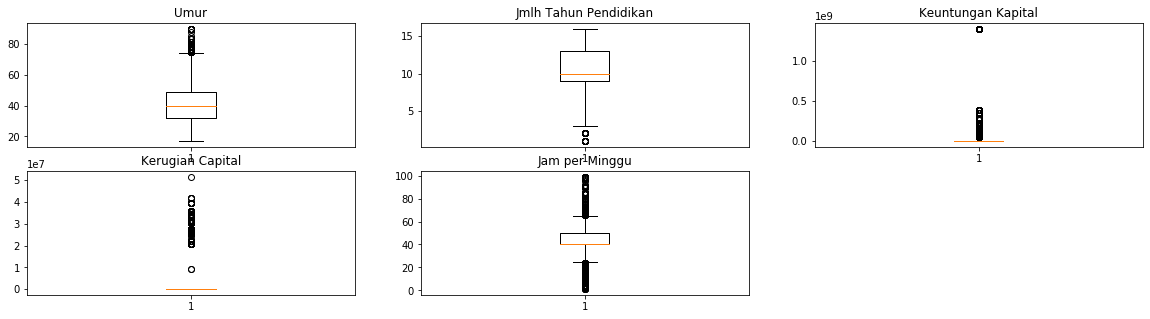

In [22]:
kolom = ["Umur",'Jmlh Tahun Pendidikan', "Keuntungan Kapital", "Kerugian Capital","Jam per Minggu"]
plt.figure(figsize=(20,5))
for i,v in enumerate(kolom):
    plt.subplot(2,3,i+1)
    plt.title(v)
    plt.boxplot(df[v])

#### Inverse Transform 

In [11]:
for i,v in enumerate(le_list):
    df[cat_col[i]] = v.inverse_transform(df[cat_col[i]])

#### Pekerjaan

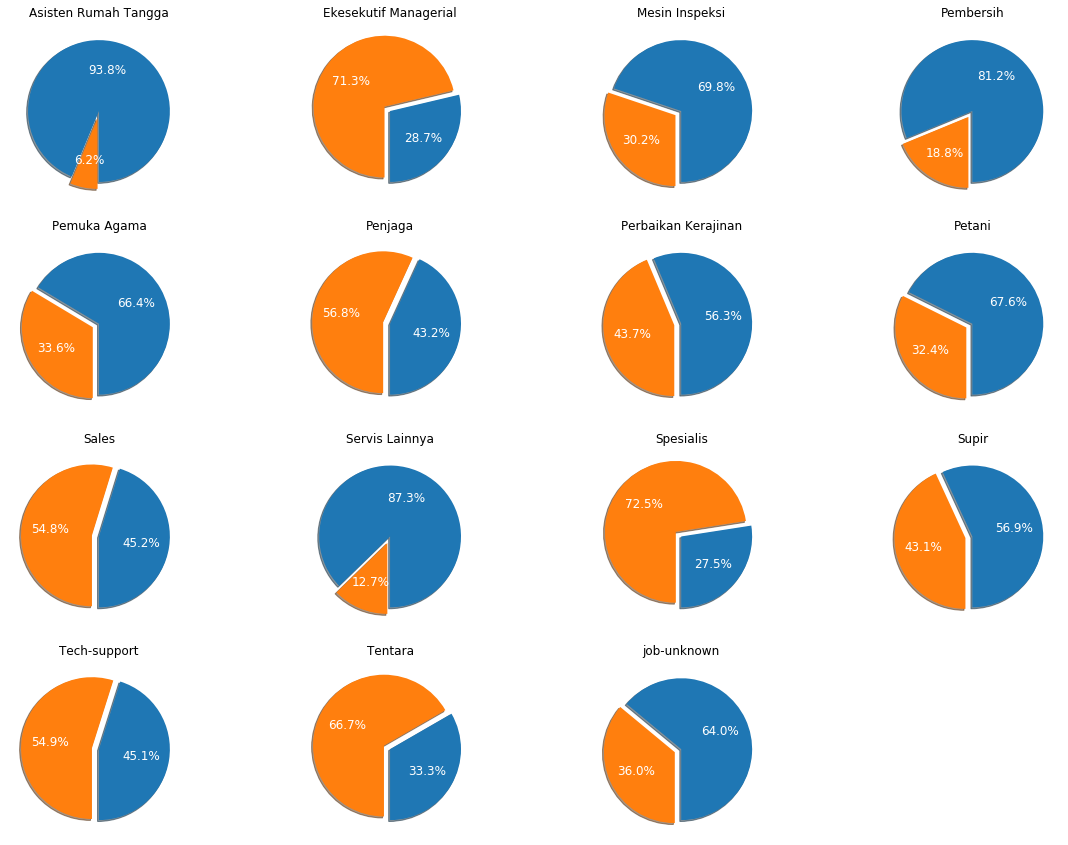

In [95]:
sal_job = pd.crosstab(index=df["Gaji"], columns=df["Pekerjaan"])
plt.figure(figsize=(20,15))
for i,v in enumerate(sal_job.columns):
    plt.subplot(4,4,i+1)
    plt.title(v)
    plt.pie(sal_job[v],autopct='%1.1f%%',
        startangle=270, shadow=True, explode=(0,.1), textprops={'color':"w","size":12},labels=[0,1])
    

In [57]:
sal_job.T

Pekerjaan,Asisten Rumah Tangga,Ekesekutif Managerial,Mesin Inspeksi,Pembersih,Pemuka Agama,Penjaga,Perbaikan Kerajinan,Petani,Sales,Servis Lainnya,Spesialis,Supir,Tech-support,Tentara,job-unknown
Gaji,,,,,,,,,,,,,,,
0,45,913,713,467,1245,171,1373,276,961,1036,837,505,269,2,382
1,3,2269,308,108,630,225,1065,132,1163,151,2212,383,327,4,215


In [81]:
pd.crosstab(index=df["Pekerjaan"], columns=df["Kelas Pekerja"])

Kelas Pekerja,Pekerja Bebas Bukan Perusahan,Pekerja Bebas Perusahaan,Pemerintah Lokal,Pemerintah Negara,Pemerintah Provinsi,Tanpa di Bayar,Tidak Pernah Bekerja,Wiraswasta,jc-unknown
Pekerjaan,,,,,,,,,
Asisten Rumah Tangga,0,0,0,0,0,0,0,48,0
Ekesekutif Managerial,278,364,184,145,137,0,0,2074,0
Mesin Inspeksi,23,7,8,7,13,1,0,962,0
Pembersih,8,1,26,6,12,1,0,521,0
Pemuka Agama,25,22,129,115,226,1,0,1357,0
Penjaga,3,4,204,73,21,0,0,91,0
Perbaikan Kerajinan,299,79,88,43,36,0,0,1893,0
Petani,187,31,10,9,4,2,0,165,0
Sales,260,245,3,7,3,0,0,1606,0


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

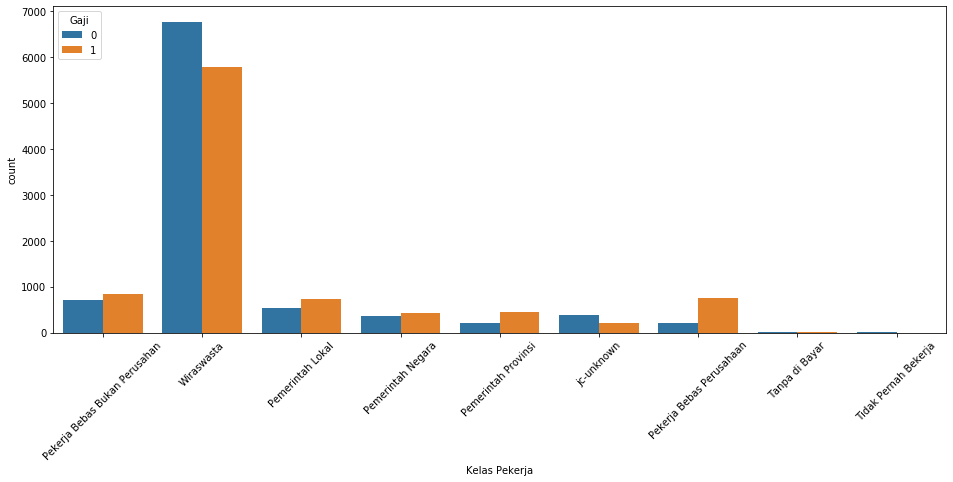

In [12]:
plt.figure(figsize=(16,6))
sns.countplot(df["Kelas Pekerja"],hue=df["Gaji"])
plt.xticks(rotation=45)

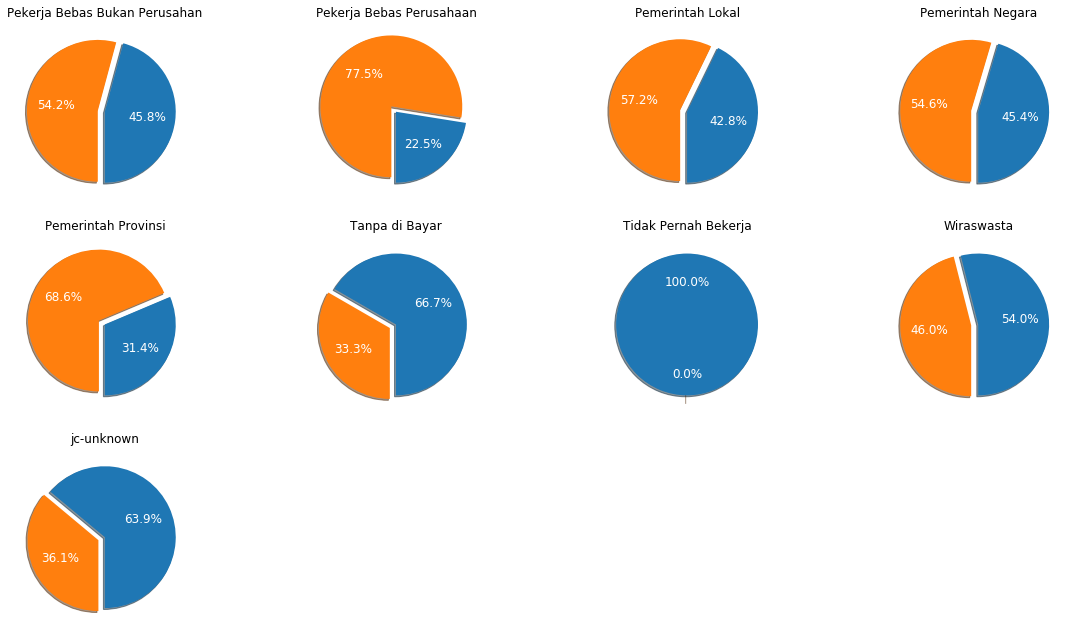

In [79]:
sal_job = pd.crosstab(index=df["Gaji"], columns=df["Kelas Pekerja"])
plt.figure(figsize=(20,15))
for i,v in enumerate(sal_job.columns):
    plt.subplot(4,4,i+1)
    plt.title(v)
    plt.pie(sal_job[v],autopct='%1.1f%%',
        startangle=270, shadow=True, explode=(0,.1), textprops={'color':"w","size":12},labels=[0,1])
    

#### Pendidikan

In [13]:
df.pivot_table(index="Pendidikan", columns="Jenis Kelamin", values="Jmlh Tahun Pendidikan",aggfunc="mean").sort_values("Laki2").T

Pendidikan,SD,1st-4th,5th-6th,7th-8th,9th,10th,11th,12th,SMA,Pendidikan Tinggi,D4,D3,Sarjana,Master,Sekolah Professional,Doktor
Jenis Kelamin,,,,,,,,,,,,,,,,
Laki2,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
Perempuan,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16


- Terdapat sedikit keanehan. seharusnya studi D4 lebih lama dari D3, namun menurut dataset justru sebaliknya
- saya asumsikan terdapat kesalahan input

In [14]:
edu_map = {
    "SD":"SD-SMP", "1st-4th":"SD-SMP", "5th-6th":"SD-SMP","SMP-SMP":"SD-SMP", "7th-8th":"SD-SMP", "9th":"SD-SMP",
    "SMA":"SMA", "10th":"SMA", "11th":"SMA", "12th":"SMA",
    "Pendidikan Tinggi":"Pendidikan Tinggi", "D3":"Pendidikan Tinggi", "D4":"Pendidikan Tinggi","Sarjana":"Pendidikan Tinggi",
    "Master":"Pendidikan Tinggi Lanjutan", "Doktor":"Pendidikan Tinggi Lanjutan", "Sekolah Professional":"Pendidikan Tinggi Lanjutan" 
}
df["Pendidikan"] = df["Pendidikan"].map(edu_map)

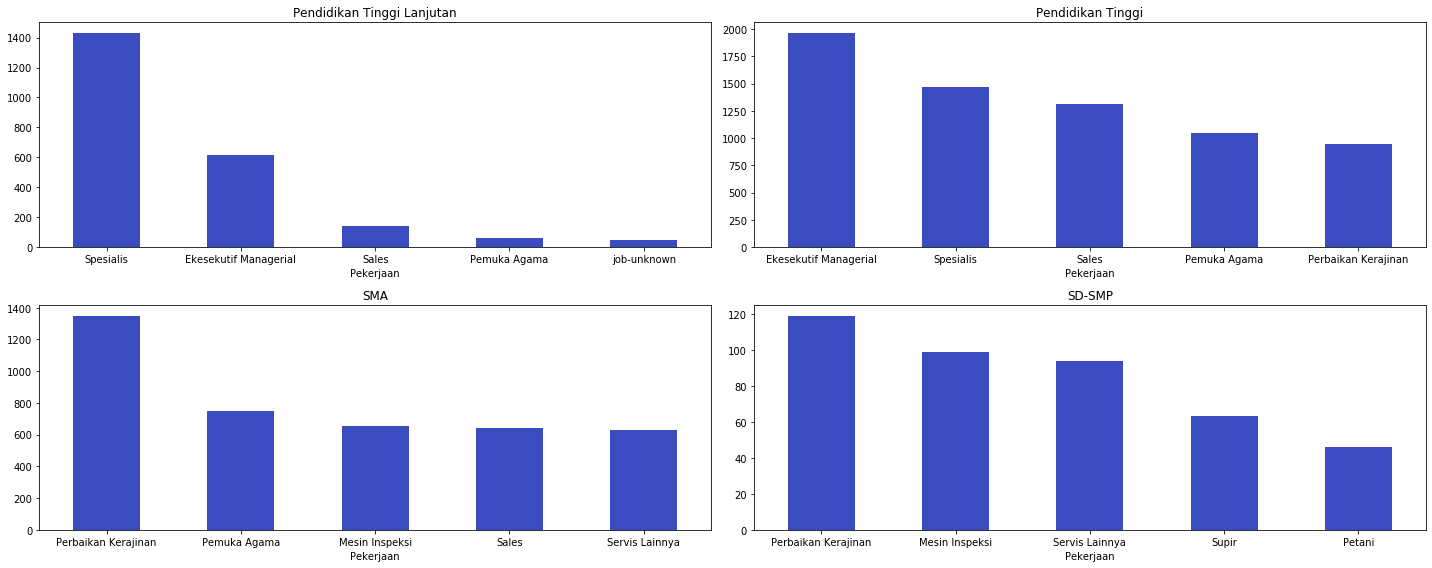

In [15]:
edu_job = pd.crosstab(index=df["Pendidikan"], columns=df["Pekerjaan"]).iloc[[1,0,3,2]]
temp = 1
plt.figure(figsize=(20,8))
for i in edu_job.T.columns:
    plt.subplot(2,2,temp)
    edu_job.T[i].sort_values(ascending=False)[:5].plot(kind="bar",cmap='coolwarm')
    plt.title(i)
    temp+=1
    plt.xticks(rotation=0)
    plt.tight_layout()


- Profesi terbanyak yang berpendidikan __Perguruan tinggi lanjutan__ adalah __Spesialis__
- Profesi terbanyak yang berpendidikan __Perguruan tinggi__ adalah __Eksekutif Managerial__
- Profesi terbanyak yang berpendidikan __SMA__ adalah __Perbaikan Kerajinan__
- Profesi terbanyak yang berpendidikan __SD-SMP__ adalah __Servis Lainnya__

In [16]:
sal_edu1 = pd.crosstab(index=df["Pendidikan"], columns=df["Gaji"], margins=True, margins_name="Jumlah").iloc[[1,0,3,2,4]]
sal_edu1.T

Pendidikan,Pendidikan Tinggi Lanjutan,Pendidikan Tinggi,SMA,SD-SMP,Jumlah
Gaji,,,,,
0,425,4015,4269,486,9195
1,1988,4952,2138,117,9195
Jumlah,2413,8967,6407,603,18390


In [17]:
sal_edu = pd.crosstab(index=df["Pendidikan"], columns=df["Gaji"]).iloc[[1,0,3,2]]

In [18]:
sal_edu.T

Pendidikan,Pendidikan Tinggi Lanjutan,Pendidikan Tinggi,SMA,SD-SMP
Gaji,,,,
0,425,4015,4269,486
1,1988,4952,2138,117


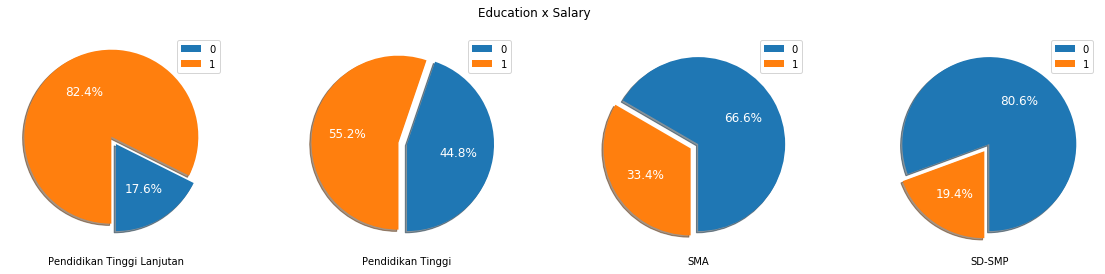

In [19]:
plt.figure(figsize=(20,4))
plt.suptitle("Education x Salary")
for i,v in enumerate(sal_edu.T.columns):
    plt.subplot(1,4,i+1)
    plt.pie(
        sal_edu.T[v],autopct='%1.1f%%',
        startangle=270, shadow=True, explode=(0,.1), textprops={'color':"w","size":12},labels=[0,1]
    )
    plt.legend()
    plt.xlabel(v)

- Semakin tinggi tingkat pendidikan semakin besar persentase memiliki gaji diatas 5 Juta

### Umur

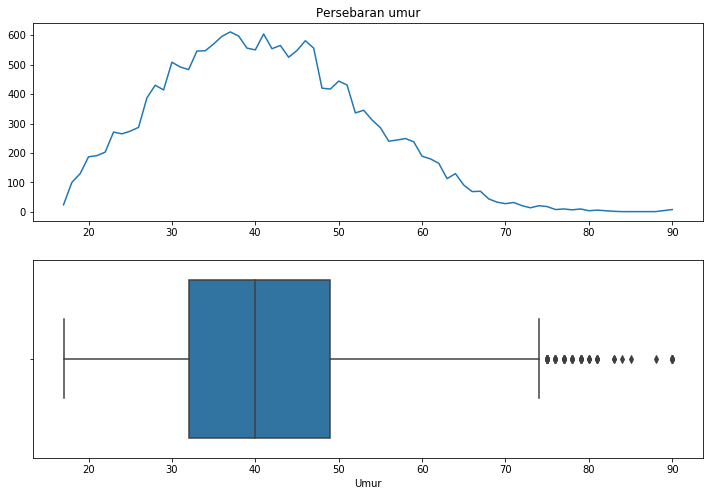

In [20]:
plt.figure(figsize=(12,8))
plt.subplot(2,1,1)
df["Umur"].value_counts().sort_index().plot()
plt.title("Persebaran umur")
plt.subplot(2,1,2)
sns.boxplot(df["Umur"])

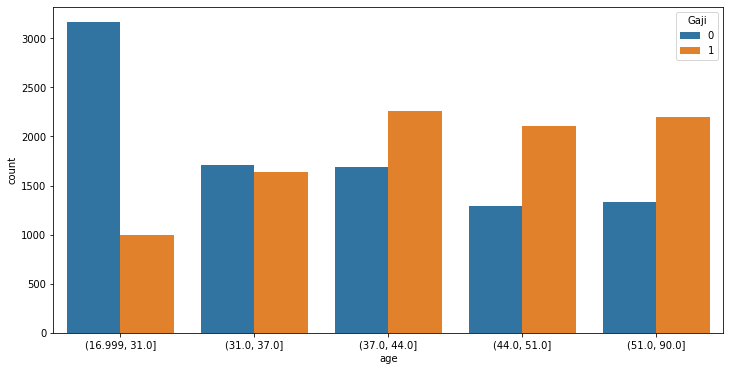

In [27]:
df["age"] = pd.qcut(df["Umur"], 5, duplicates="drop")
plt.figure(figsize=(12,6))
sns.countplot(df["age"],hue=df["Gaji"])
plt.show()

- ratio memiliki gaji diatas 5jt semakin meningkat seiring meningkatnya umur

Text(0, 0.5, 'JPM')

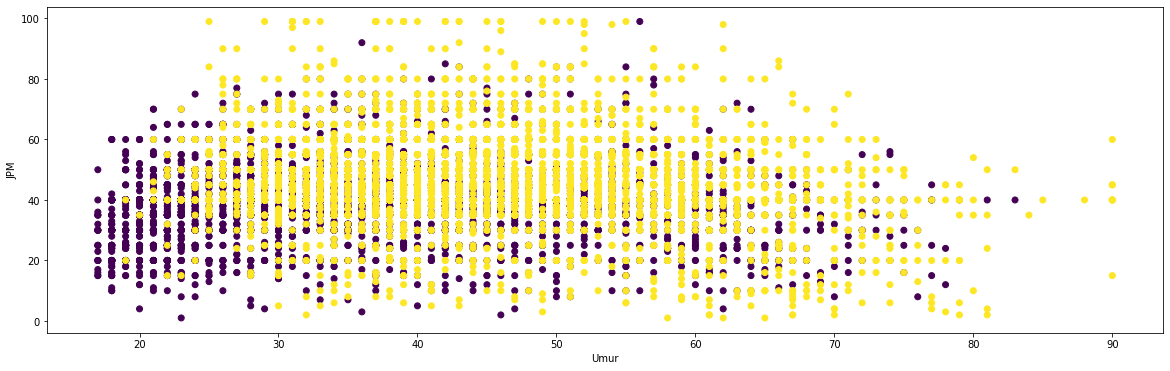

In [28]:
plt.figure(figsize=(20,6))
plt.scatter(df["Umur"], df["Jam per Minggu"],c=df["Gaji"])
plt.xlabel("Umur")
plt.ylabel("JPM")

In [21]:
df["Umur"].describe()

count    18390.000000
mean        41.102664
std         11.740131
min         17.000000
25%         32.000000
50%         40.000000
75%         49.000000
max         90.000000
Name: Umur, dtype: float64

- dapat dilihat dari boxplot tersebut, data dengan nilai umur diatas 78 dianggap outlier

### Jenis Kelamin

In [22]:
pd.crosstab(index=df["Jenis Kelamin"], columns=df["Gaji"], margins=True, margins_name="Jumlah")

Gaji,0,1,Jumlah
Jenis Kelamin,,,
Laki2,5893,7786,13679
Perempuan,3302,1409,4711
Jumlah,9195,9195,18390


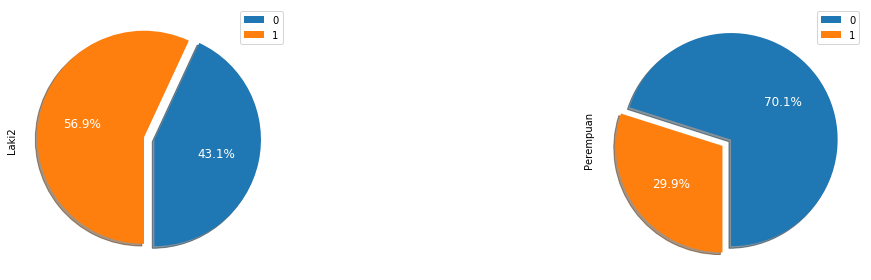

In [23]:
sal_sex = pd.crosstab(index=df["Jenis Kelamin"], columns=df["Gaji"])
sal_sex.T.plot(kind="pie",figsize=(20,4), subplots=True, autopct='%1.1f%%',
                      startangle=270, fontsize=12, shadow=True, explode=(0,.1), textprops={'color':"w"})
plt.tight_layout()
plt.show()

In [24]:
df["Jam per Minggu"].describe()

count    18390.000000
mean        43.068026
std         10.399800
min          1.000000
25%         40.000000
50%         40.000000
75%         50.000000
max         99.000000
Name: Jam per Minggu, dtype: float64

<function matplotlib.pyplot.show(*args, **kw)>

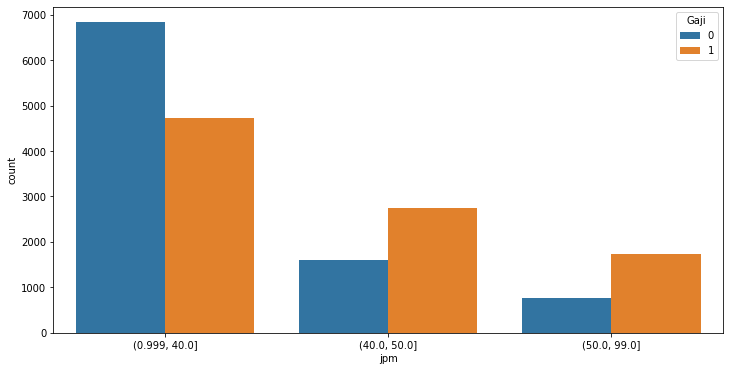

In [25]:
df["jpm"] = pd.qcut(df["Jam per Minggu"], 4, duplicates="drop")
plt.figure(figsize=(12,6))
sns.countplot(df["jpm"],hue=df["Gaji"])
plt.show

In [26]:
df["Jam per Minggu"].describe()

count    18390.000000
mean        43.068026
std         10.399800
min          1.000000
25%         40.000000
50%         40.000000
75%         50.000000
max         99.000000
Name: Jam per Minggu, dtype: float64

In [29]:
print(df["Kerugian Capital"].mean())
print(df["Kerugian Capital"].sum()/len(df[df["Kerugian Capital"]>0]))

1335154.6492659054
27650331.08108108


In [30]:
df_PL = df.copy()
df_PL[["Keuntungan Kapital", "Kerugian Capital"]] = df_PL[["Keuntungan Kapital", "Kerugian Capital"]].replace(0,np.nan)
df_P = df_PL.loc[df_PL[["Keuntungan Kapital"]].dropna().index]
df_L = df_PL.loc[df_PL[["Kerugian Capital"]].dropna().index]

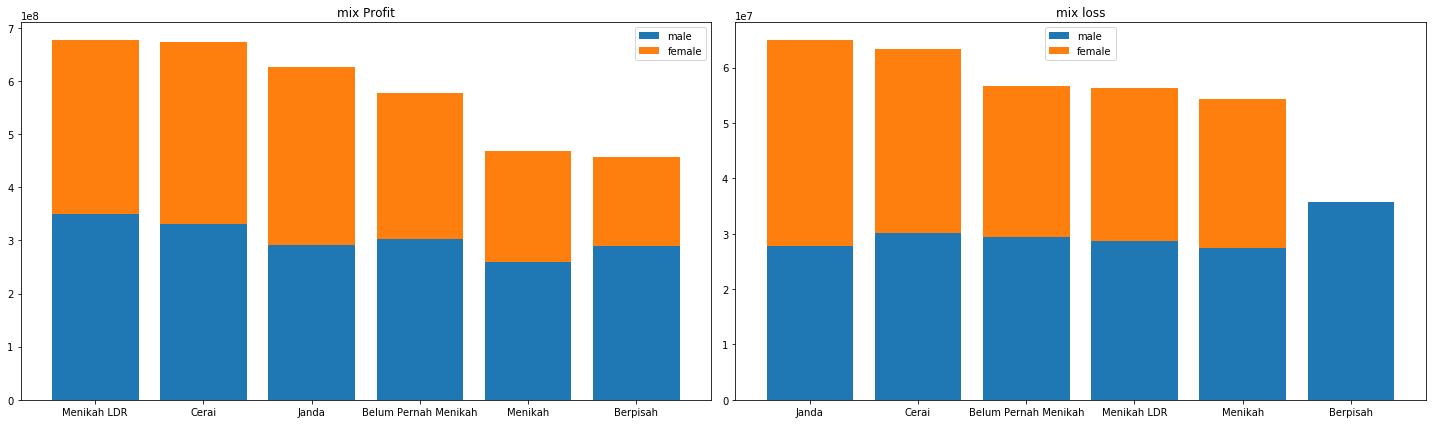

In [31]:
mix_edu_pro = df_P.pivot_table(index="Status Perkawinan", columns="Jenis Kelamin", values="Keuntungan Kapital",aggfunc="mean")
mix_edu_los = df_L.pivot_table(index="Status Perkawinan", columns="Jenis Kelamin", values="Kerugian Capital",aggfunc="mean")
mix_edu_pro["sum"] = mix_edu_pro.apply(lambda x:x["Laki2"]+x["Perempuan"],axis=1)
mix_edu_los["sum"] = mix_edu_los.apply(lambda x:x["Laki2"]+x["Perempuan"],axis=1)
mix_edu_pro = mix_edu_pro.sort_values("sum",ascending=False)
mix_edu_los = mix_edu_los.sort_values("sum",ascending=False)

plt.figure(figsize=(20,6))
plt.subplot(121)
plt.bar(mix_edu_pro.index, height=mix_edu_pro["Laki2"],label = "male")
plt.bar(mix_edu_pro.index, height=mix_edu_pro["Perempuan"],bottom=mix_edu_pro["Laki2"],label = "female")
plt.xticks(rotation=0)
plt.title("mix Profit")
plt.legend()

plt.subplot(122)
plt.bar(mix_edu_los.index, height=mix_edu_los["Laki2"],label="male")
plt.bar(mix_edu_los.index, height=mix_edu_los["Perempuan"],bottom=mix_edu_los["Laki2"],label="female")
plt.xticks(rotation=0)
plt.title("mix loss")
plt.legend()

plt.tight_layout()

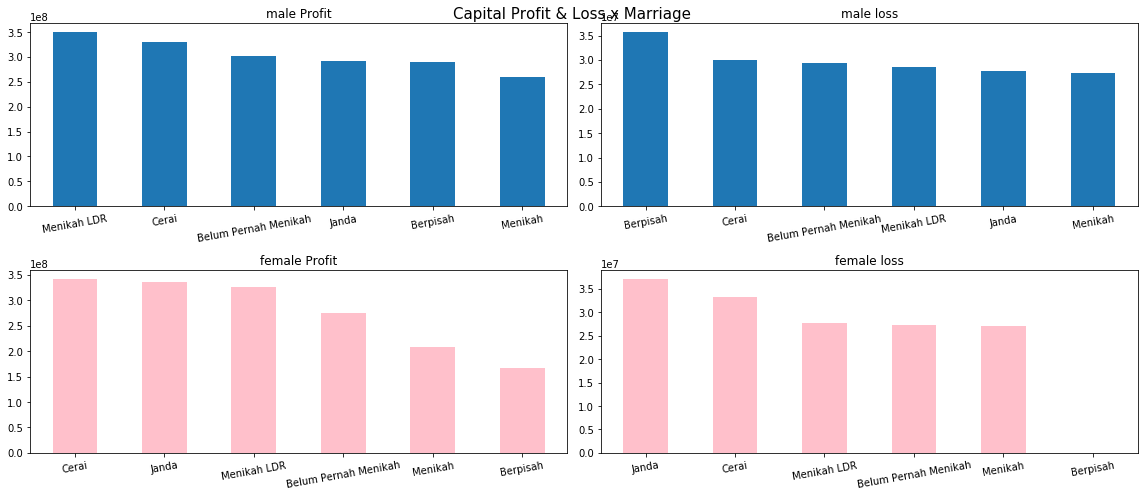

In [32]:
plt.figure(figsize=(16,7))
plt.suptitle("Capital Profit & Loss x Marriage",size=15)
### Marriage x keuntungan kapital
m_edu_pro = df_P.pivot_table(index="Status Perkawinan", columns="Jenis Kelamin", values="Keuntungan Kapital",aggfunc="mean").sort_values("Laki2",ascending=False)["Laki2"]
f_edu_pro = df_P.pivot_table(index="Status Perkawinan", columns="Jenis Kelamin", values="Keuntungan Kapital",aggfunc="mean").sort_values("Perempuan",ascending=False)["Perempuan"]

### Marriage x kerugian kapital
m_edu_los = df_L.pivot_table(index="Status Perkawinan", columns="Jenis Kelamin", values="Kerugian Capital",aggfunc="mean").sort_values("Laki2",ascending=False)["Laki2"]
f_edu_los = df_L.pivot_table(index="Status Perkawinan", columns="Jenis Kelamin", values="Kerugian Capital",aggfunc="mean").sort_values("Perempuan",ascending=False)["Perempuan"]

plt.subplot(2,2,1)
m_edu_pro.plot(kind="bar")
plt.title("male Profit")
plt.xticks(rotation=10)
plt.xlabel("")

plt.subplot(2,2,2)
m_edu_los.plot(kind="bar")
plt.title("male loss")
plt.xticks(rotation=10)
plt.xlabel("")

plt.subplot(2,2,3)
f_edu_pro.plot(kind="bar",color="pink")
plt.xticks(rotation=10)
plt.title("female Profit")
plt.xlabel("")

plt.subplot(2,2,4)
f_edu_los.plot(kind="bar",color="pink")
plt.xticks(rotation=10)
plt.title("female loss")
plt.xlabel("")

plt.tight_layout()
plt.show()

In [33]:
df_PL = df.copy()
df_PL[["Keuntungan Kapital", "Kerugian Capital"]] = df_PL[["Keuntungan Kapital", "Kerugian Capital"]].replace(0,np.nan)
df_P = df_PL.loc[df_PL[["Keuntungan Kapital"]].dropna().index]
df_L = df_PL.loc[df_PL[["Kerugian Capital"]].dropna().index]

In [34]:
mix_edu_pro

Jenis Kelamin,Laki2,Perempuan,sum
Status Perkawinan,,,
Menikah LDR,3.497988e+08,3.269210e+08,6.767198e+08
Cerai,3.305307e+08,3.422470e+08,6.727777e+08
Janda,2.909950e+08,3.349612e+08,6.259562e+08
Belum Pernah Menikah,3.027419e+08,2.745299e+08,5.772718e+08
Menikah,2.591052e+08,2.089806e+08,4.680858e+08
Berpisah,2.896067e+08,1.673910e+08,4.569977e+08


In [35]:
# mix_edu_pro
# df_P[df_P["Keuntungan Kapital"]==df_P["Keuntungan Kapital"].max()]
# df_P.sort_values("Keuntungan Kapital",ascending=False)
df_P[(df_P["Pendidikan"]=="SD-SMP") & (df_P["Jenis Kelamin"]=="Perempuan")]

,Umur,Kelas Pekerja,Berat Akhir,Pendidikan,Jmlh Tahun Pendidikan,Status Perkawinan,Pekerjaan,Jenis Kelamin,Keuntungan Kapital,Kerugian Capital,Jam per Minggu,Gaji,jpm,age
14416,55,Wiraswasta,408537,SD-SMP,5,Cerai,Perbaikan Kerajinan,Perempuan,1.399986e+09,NaN,37.0,1,"(0.999, 40.0]","(51.0, 90.0]"


- data outlier

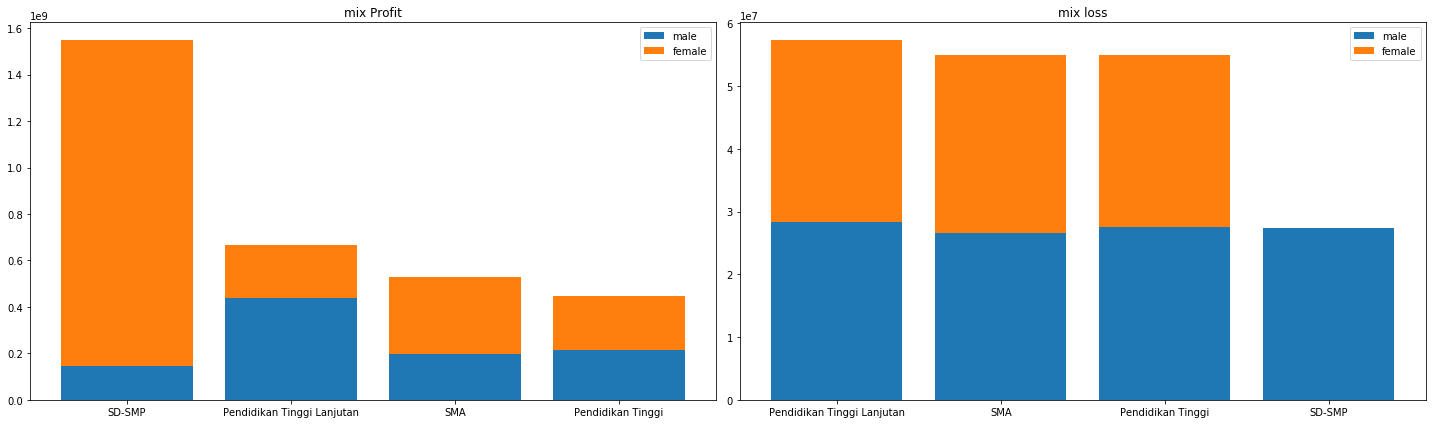

In [36]:
mix_edu_pro = df_P.pivot_table(index="Pendidikan", columns="Jenis Kelamin", values="Keuntungan Kapital",aggfunc="mean")
mix_edu_los = df_L.pivot_table(index="Pendidikan", columns="Jenis Kelamin", values="Kerugian Capital",aggfunc="mean")
mix_edu_pro["sum"] = mix_edu_pro.apply(lambda x:x["Laki2"]+x["Perempuan"],axis=1)
mix_edu_los["sum"] = mix_edu_los.apply(lambda x:x["Laki2"]+x["Perempuan"],axis=1)
mix_edu_pro = mix_edu_pro.sort_values("sum",ascending=False)
mix_edu_los = mix_edu_los.sort_values("sum",ascending=False)

plt.figure(figsize=(20,6))
plt.subplot(121)
plt.bar(mix_edu_pro.index, height=mix_edu_pro["Laki2"],label = "male")
plt.bar(mix_edu_pro.index, height=mix_edu_pro["Perempuan"],bottom=mix_edu_pro["Laki2"],label = "female")
plt.xticks(rotation=0)
plt.title("mix Profit")
plt.legend()

plt.subplot(122)
plt.bar(mix_edu_los.index, height=mix_edu_los["Laki2"],label="male")
plt.bar(mix_edu_los.index, height=mix_edu_los["Perempuan"],bottom=mix_edu_los["Laki2"],label="female")
plt.xticks(rotation=0)
plt.title("mix loss")
plt.legend()

plt.tight_layout()

In [37]:
df[df["Kerugian Capital"] > 
       df["Kerugian Capital"].sum() / len(df[df["Kerugian Capital"]>0])
  ].sort_values("Kerugian Capital",ascending=False)

,Umur,Kelas Pekerja,Berat Akhir,Pendidikan,Jmlh Tahun Pendidikan,Status Perkawinan,Pekerjaan,Jenis Kelamin,Keuntungan Kapital,Kerugian Capital,Jam per Minggu,Gaji,jpm,age
11640,74,Pemerintah Negara,88638,Pendidikan Tinggi Lanjutan,16,Belum Pernah Menikah,Spesialis,Perempuan,0.0,51562000.0,20.0,1,"(0.999, 40.0]","(51.0, 90.0]"
10241,41,Wiraswasta,70037,Pendidikan Tinggi,10,Belum Pernah Menikah,Perbaikan Kerajinan,Laki2,0.0,42056000.0,60.0,1,"(50.0, 99.0]","(37.0, 44.0]"
17120,39,Wiraswasta,159168,Pendidikan Tinggi,11,Janda,Ekesekutif Managerial,Perempuan,0.0,42056000.0,40.0,1,"(0.999, 40.0]","(37.0, 44.0]"
16710,43,Wiraswasta,33658,Pendidikan Tinggi,10,Menikah LDR,Perbaikan Kerajinan,Laki2,0.0,42056000.0,40.0,1,"(0.999, 40.0]","(37.0, 44.0]"
15072,45,Wiraswasta,172274,Pendidikan Tinggi Lanjutan,16,Cerai,Spesialis,Perempuan,0.0,42056000.0,35.0,1,"(0.999, 40.0]","(44.0, 51.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12984,58,Pekerja Bebas Bukan Perusahan,147653,SMA,6,Menikah,Perbaikan Kerajinan,Perempuan,0.0,27678000.0,35.0,1,"(0.999, 40.0]","(51.0, 90.0]"
13032,45,Wiraswasta,145636,Pendidikan Tinggi Lanjutan,14,Menikah,Ekesekutif Managerial,Laki2,0.0,27678000.0,43.0,1,"(40.0, 50.0]","(44.0, 51.0]"
13097,41,Wiraswasta,137126,Pendidikan Tinggi,13,Menikah,Spesialis,Laki2,0.0,27678000.0,45.0,1,"(40.0, 50.0]","(37.0, 44.0]"
13125,36,Pekerja Bebas Bukan Perusahan,36270,SMA,9,Menikah,Petani,Laki2,0.0,27678000.0,65.0,1,"(50.0, 99.0]","(31.0, 37.0]"


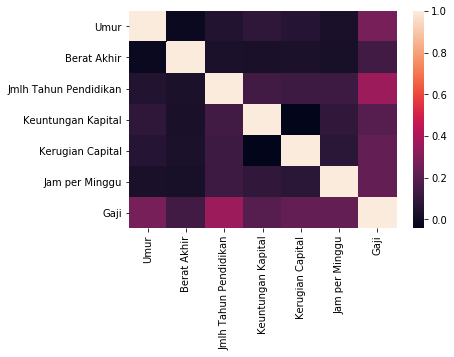

In [86]:
sns.heatmap(df.corr())